<a href="https://www.kaggle.com/code/katecaldwell/exploring-political-reddit-post-data?scriptVersionId=96780052" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Exploration

In this notebook, I examine text data found in Reddit posts, which are labeled as 'Liberal' or 'Conservative,' and can be found [here](http://www.kaggle.com/datasets/neelgajare/liberals-vs-conservatives-on-reddit-13000-posts).

In [1]:
# imports and load data

import numpy as np
import pandas as pd

reddit_politics = pd.read_csv(
    "../input/liberals-vs-conservatives-on-reddit-13000-posts/file_name.csv")

reddit_politics.head()

,Title,Political Lean,Score,Id,Subreddit,URL,Num of Comments,Text,Date Created
0,"No matter who someone is, how they look like, ...",Liberal,1,t5fybt,socialism,https://v.redd.it/ng5fyl7hp2l81,0,NaN,1.646272e+09
1,Biden speech draws 38.2 million U.S. TV viewers,Liberal,6,t5fqdn,democrats,https://www.reuters.com/world/us/biden-speech-...,1,NaN,1.646271e+09
2,State of the union,Liberal,1,t5fj9a,DemocraticSocialism,https://www.reddit.com/r/DemocraticSocialism/c...,1,Who watched the state of the union last night ...,1.646270e+09
3,We Should Just Give Poor People Money,Liberal,7,t5f7n9,SocialDemocracy,https://youtu.be/a80kRjpubG0,3,NaN,1.646270e+09
4,Do it for the Dew,Liberal,6,t5es2c,democrats,https://i.redd.it/drmunn90f2l81.jpg,1,NaN,1.646268e+09


In [2]:
# Note that all columns have 12854 samples, except 'Text' which only has 2428 non-null samples

reddit_politics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12854 entries, 0 to 12853
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            12854 non-null  object 
 1   Political Lean   12854 non-null  object 
 2   Score            12854 non-null  int64  
 3   Id               12854 non-null  object 
 4   Subreddit        12854 non-null  object 
 5   URL              12854 non-null  object 
 6   Num of Comments  12854 non-null  int64  
 7   Text             2428 non-null   object 
 8   Date Created     12854 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 903.9+ KB


In [3]:
# look at the sampling distribution

reddit_politics['Political Lean'].value_counts()

Liberal         8319
Conservative    4535
Name: Political Lean, dtype: int64

<AxesSubplot:>

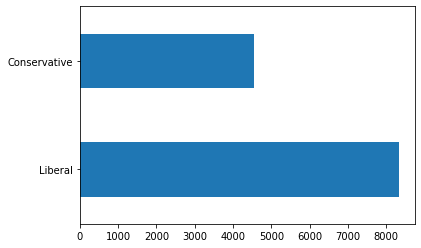

In [4]:
reddit_politics['Political Lean'].value_counts().plot.barh()

In [5]:
# looking at a 'Title'

reddit_politics['Title'][600]

'When you reproduce quotes made up by rich people...'

<AxesSubplot:>

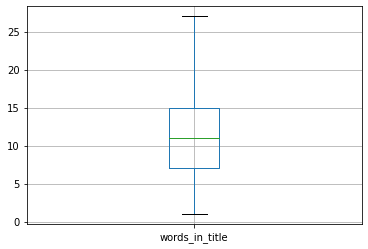

In [6]:
# look at length of titles

reddit_politics["words_in_title"] = reddit_politics["Title"].str.split().apply(len)
reddit_politics.boxplot("words_in_title", showfliers=False)

<AxesSubplot:>

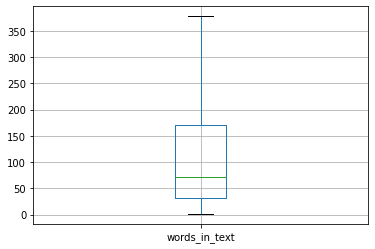

In [7]:
# look at length of text

reddit_politics_text = reddit_politics.dropna()

reddit_politics["words_in_text"] = reddit_politics_text["Text"].str.split().apply(len)
reddit_politics.boxplot("words_in_text", showfliers=False)

In [8]:
# looking at one sample of text

reddit_politics_text["Text"][20]

"One of the things I have noticed in todays world is the obsession and greed for wealth.\nIf say uk was to rise up to become socialist what would be the best way to support in doing this.\nI'm really struggling to know who to vote for in the next election since Labour got rid of corbyn."

In [9]:
# counts for label distribution of texts in Reddit politics

reddit_politics_text['Political Lean'].value_counts()

Liberal         1471
Conservative     957
Name: Political Lean, dtype: int64